In [2]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as animation

#### ex. 3

implementation with list

In [3]:
def m_mult(A, B):

    assert len(A[0]) == len(B), 'ERROR: matrix dimensions not matching'

    C = []
    for k in range(len(A)):
        C.append([])
        for i in range(len(B[0])):
            C[k].append(0)
            for j in range(len(A[0])):
                C[k][i] = C[k][i] + A[k][j]*B[j][i]

    return C

In [4]:
I = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
N = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]

print(m_mult(I, N))
print(m_mult(N, I))

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]
[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [5]:
M = [[1, 2], [3, 4], [5, 6]]

print(m_mult(N, M))
# print(m_mult(M, N))

[[22, 28], [49, 64], [76, 100]]


In [6]:
%timeit m_mult(N, I)

9 µs ± 62.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


implementation with numpy

In [7]:
R = np.array(list(range(1, 10))).reshape(3, 3)
J = np.eye(3)

print(np.matmul(R , J))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [8]:
%timeit np.matmul(R, J)

2.61 µs ± 42.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


#### ex. 5 (Conway's game of life)

building the initial grid

In [3]:
# l_grid is the square root of the size of the grid, f indicates (roughly) the fraction of initially 'alive' cells
l_grid = 20
f = 0.2

# initializing the grid
grid = np.zeros((l_grid+2)**2)

# seeding randomly
s_seed = int((l_grid+2)**2 * f)
seed = np.random.choice(range((l_grid+2)**2), size = s_seed, replace = False)
grid[seed] = 1

# reshaping and adding boundaries
grid = grid.reshape(l_grid+2, l_grid+2)
grid[:, 0::l_grid+1] = 3
grid[0::l_grid+1, :] = 3

print(grid)

[[3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
 [3. 0. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 3.]
 [3. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 3.]
 [3. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 1. 3.]
 [3. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 3.]
 [3. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 3.]
 [3. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
 [3. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 3.]
 [3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 3.]
 [3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 3.]
 [3. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 3.]
 [3. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 3.]
 [3. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 3.]
 [3. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 3.]
 [3. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.

defining the function for the iteration of the game

In [5]:
def game(grid, l_grid, generations):

    evol = []   # keeps record of the generations (only multiples of 10)

    provv1 = np.zeros((l_grid+2)**2).reshape(l_grid+2, l_grid+2)
    provv1[:, 0::l_grid+1] = 3
    provv1[0::l_grid+1, :] = 3
    provv2 = np.zeros((l_grid+2)**2).reshape(l_grid+2, l_grid+2)
    provv2[:, 0::l_grid+1] = 3
    provv2[0::l_grid+1, :] = 3

    for gen in range(generations):

        for i in range(1, l_grid+1):
            for j in range(1, l_grid+1):
                neighbors = grid[i-1:i+2, j-1:j+2]
                n = neighbors[neighbors==1].size - grid[i, j]
                if (grid[i, j] and n in (2, 3)) or ((not grid[i, j]) and n==3):
                    provv1[i, j] = 1
                else:
                    provv1[i, j] = 0

        provv1, grid = grid, provv1
        evol.append(grid.astype(int))   # senza typecast non funziona la gif!!!

    return evol

playing

MovieWriter ffmpeg unavailable; using Pillow instead.


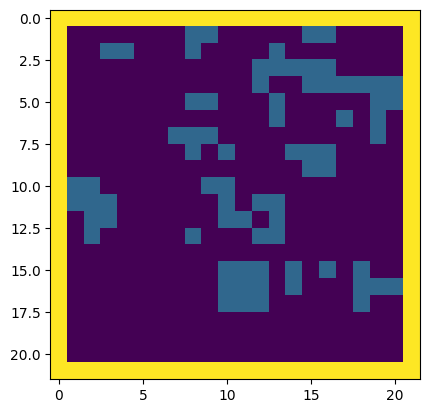

In [6]:
game_of_life = game(grid, l_grid, 50)

fig = plt.figure()

def animate(i):
    plt.imshow(game_of_life[i])

anim = animation.FuncAnimation(fig, animate, frames = 50, interval=300)

# save the animation as an gif
anim.save("game_of_life.gif")